# Bioinformática na prática: genes e câncer de mama/ovário

Este notebook explora dados simulados de **200 pessoas**, investigando a relação entre **mutações genéticas** (BRCA1, TP53, MTHFR) e a ocorrência de **câncer de mama e câncer de ovário**.  

As análises realizadas incluem:  
- Distribuição de **idade** da amostra  
- Frequência das **mutações genéticas**  
- Proporção de **câncer por gênero** e por mutação  
- **Correlação entre cada gene e a ocorrência de câncer**  
- **Correlação entre idade e câncer**, destacando como o risco aumenta com a idade

Este notebook demonstra como a **Bioinformática** pode ser aplicadas para compreender fatores de risco e padrões biológicos associados ao câncer de mama.


## Criando a base de dados

Vamos gerar dados fictícios para 200 pessoas, com as variáveis:  
- Idade  
- Sexo  
- Mutação nos genes BRCA1, TP53 e MTHFR  
- Câncer de mama/ovário (Sim/Não)  


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 200

# Sexo e idade
sexos = np.random.choice(["F", "M"], size=n, p=[0.7, 0.3])
idades = np.random.randint(25, 70, size=n)

# Geração de mutações
mut_brca1 = np.random.choice(["Sim", "Não"], size=n, p=[0.25, 0.75])
mut_tp53 = np.random.choice(["Sim", "Não"], size=n, p=[0.15, 0.85])
mut_mthfr = np.random.choice(["Sim", "Não"], size=n, p=[0.20, 0.80])

# Definição do câncer
cancer = []
for i in range(n):
    if sexos[i] == "M":
        cancer.append("Sim" if np.random.rand() < 0.01 else "Não")
    else:
        if mut_brca1[i] == "Sim" and np.random.rand() < 0.65:
            cancer.append("Sim")
        elif mut_tp53[i] == "Sim" and np.random.rand() < 0.25:
            cancer.append("Sim")
        else:
            cancer.append("Sim" if np.random.rand() < 0.1 else "Não")

df = pd.DataFrame({
    "Idade": idades,
    "Sexo": sexos,
    "Mutacao_BRCA1": mut_brca1,
    "Mutacao_TP53": mut_tp53,
    "Mutacao_MTHFR": mut_mthfr,
    "Cancer": cancer
})

df.head()


,Idade,Sexo,Mutacao_BRCA1,Mutacao_TP53,Mutacao_MTHFR,Cancer
0,48,F,Não,Não,Não,Não
1,35,M,Sim,Sim,Não,Não
2,32,M,Não,Sim,Não,Não
3,60,F,Não,Não,Não,Não
4,62,F,Não,Não,Não,Não


## Frequências e contagens

Nesta seção, mostramos a **distribuição absoluta e proporcional** das variáveis categóricas:  
- **Gênero:** número de homens e mulheres  
- **Câncer:** número de pessoas com e sem câncer  
- **Mutações genéticas:** contagem de pessoas com ou sem mutação em cada gene  

Essas análises ajudam a entender a composição da amostra antes de qualquer análise de correlação ou média.


In [ ]:
# Frequência por gênero
freq_genero = df["Sexo"].value_counts()
prop_genero = df["Sexo"].value_counts(normalize=True)

# Frequência de câncer
freq_cancer = df["Cancer"].value_counts()
prop_cancer = df["Cancer"].value_counts(normalize=True)

# Frequência de mutações
freq_brca1 = df["Mutacao_BRCA1"].value_counts()
prop_brca1 = df["Mutacao_BRCA1"].value_counts(normalize=True)

freq_tp53 = df["Mutacao_TP53"].value_counts()
prop_tp53 = df["Mutacao_TP53"].value_counts(normalize=True)

freq_mthfr = df["Mutacao_MTHFR"].value_counts()
prop_mthfr = df["Mutacao_MTHFR"].value_counts(normalize=True)

# Exibir em tabela
print("Frequência por gênero:\n", pd.concat([freq_genero, prop_genero], axis=1).rename(columns={0:"Frequência",1:"Proporção"}), "\n")
print("Frequência de câncer:\n", pd.concat([freq_cancer, prop_cancer], axis=1).rename(columns={0:"Frequência",1:"Proporção"}), "\n")
print("Frequência de BRCA1:\n", pd.concat([freq_brca1, prop_brca1], axis=1).rename(columns={0:"Frequência",1:"Proporção"}), "\n")
print("Frequência de TP53:\n", pd.concat([freq_tp53, prop_tp53], axis=1).rename(columns={0:"Frequência",1:"Proporção"}), "\n")
print("Frequência de MTHFR:\n", pd.concat([freq_mthfr, prop_mthfr], axis=1).rename(columns={0:"Frequência",1:"Proporção"}))


Frequência por gênero:
       count  proportion
Sexo                   
F       140         0.7
M        60         0.3 

Frequência de câncer:
         count  proportion
Cancer                   
Não       168        0.84
Sim        32        0.16 

Frequência de BRCA1:
                count  proportion
Mutacao_BRCA1                   
Não              156        0.78
Sim               44        0.22 

Frequência de TP53:
               count  proportion
Mutacao_TP53                   
Não             167       0.835
Sim              33       0.165 

Frequência de MTHFR:
                count  proportion
Mutacao_MTHFR                   
Não              155       0.775
Sim               45       0.225


/tmp/ipython-input-2683581127.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cancer", data=df, palette=cores_cancer)  # sem edgecolor


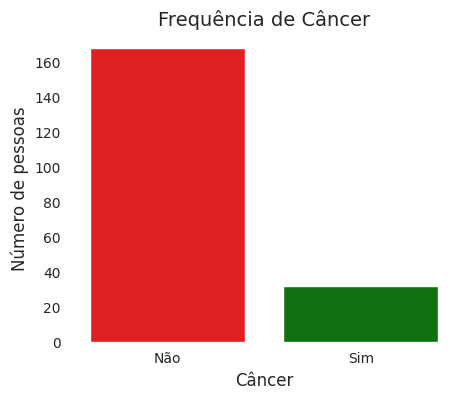

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo minimalista
sns.set_style("white")  # fundo branco sem linhas de grade

# Definindo cores: verde = Sim, vermelho = Não
cores_cancer = {"Sim":"green", "Não":"red"}

plt.figure(figsize=(5,4))
sns.countplot(x="Cancer", data=df, palette=cores_cancer)  # sem edgecolor

plt.title("Frequência de Câncer", fontsize=14)
plt.ylabel("Número de pessoas", fontsize=12)
plt.xlabel("Câncer", fontsize=12)

# Remover todas as bordas (topo, direita, esquerda, inferior)
sns.despine(top=True, right=True, left=True, bottom=True)

# Remover linhas de grade
plt.grid(False)

plt.show()


## Análise de Médias

Nesta seção, analisamos a **média de ocorrência de câncer** considerando diferentes variáveis da nossa base de dados.


In [ ]:
# Converter Sim/Não para 1/0
df_num = df.copy()
for col in ["Mutacao_BRCA1","Mutacao_TP53","Mutacao_MTHFR","Cancer"]:
    df_num[col] = df_num[col].map({"Sim":1, "Não":0})

# Média de câncer por gênero
media_cancer_genero = df_num.groupby("Sexo")["Cancer"].mean()
print("Média de câncer por gênero:")
print(media_cancer_genero, "\n")

# Média de câncer por idade (faixa etária)
media_cancer_idade = df_num.groupby(pd.cut(df_num["Idade"], bins=[24,34,44,54,64,74]), observed=False)["Cancer"].mean()
print("Média de câncer por faixa etária:")
print(media_cancer_idade, "\n")

# Média de câncer por gene
media_cancer_genes = df_num.groupby("Mutacao_BRCA1")["Cancer"].mean().rename("BRCA1")
media_cancer_genes = pd.concat([media_cancer_genes,
                                df_num.groupby("Mutacao_TP53")["Cancer"].mean().rename("TP53"),
                                df_num.groupby("Mutacao_MTHFR")["Cancer"].mean().rename("MTHFR")], axis=1)
print("Média de câncer por mutação genética:")
print(media_cancer_genes)


Média de câncer por gênero:
Sexo
F    0.221429
M    0.016667
Name: Cancer, dtype: float64 

Média de câncer por faixa etária:
Idade
(24, 34]    0.131579
(34, 44]    0.114286
(44, 54]    0.157895
(54, 64]    0.132075
(64, 74]    0.411765
Name: Cancer, dtype: float64 

Média de câncer por mutação genética:
      BRCA1      TP53     MTHFR
0  0.083333  0.143713  0.154839
1  0.431818  0.242424  0.177778


/tmp/ipython-input-3629081436.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genes, y=proporcao_cancer, palette=cores)


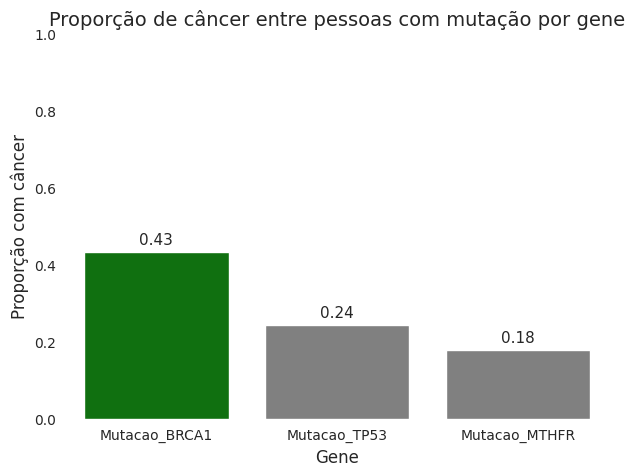

In [ ]:
sns.set_style("white")
plt.figure(figsize=(7,5))

genes = ["Mutacao_BRCA1", "Mutacao_TP53", "Mutacao_MTHFR"]
proporcao_cancer = []

# Calcular proporção de câncer diretamente
for gene in genes:
    total = df[df[gene]=="Sim"].shape[0]
    cancer_sim = df[(df[gene]=="Sim") & (df["Cancer"]=="Sim")].shape[0]
    proporcao = cancer_sim / total if total > 0 else 0
    proporcao_cancer.append(proporcao)

# Criar cor diferenciada para BRCA1
cores = ["green" if g=="Mutacao_BRCA1" else "gray" for g in genes]

# Plotar gráfico
sns.barplot(x=genes, y=proporcao_cancer, palette=cores)

plt.title("Proporção de câncer entre pessoas com mutação por gene", fontsize=14)
plt.ylabel("Proporção com câncer", fontsize=12)
plt.xlabel("Gene", fontsize=12)
plt.ylim(0,1)

# Remover todas as bordas
sns.despine(top=True, right=True, left=True, bottom=True)
plt.grid(False)

# Mostrar valores no topo
for i, v in enumerate(proporcao_cancer):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=11)

plt.show()

## Análise por Faixas Etárias

Nesta seção analisamos a distribuição de câncer por **faixa etária**:

In [ ]:
# Criar faixas etárias
def criar_faixas_etarias(idade):
    if idade < 30:
        return '18-29'
    elif idade < 40:
        return '30-39'
    elif idade < 50:
        return '40-49'
    elif idade < 60:
        return '50-59'
    elif idade < 70:
        return '60-69'
    else:
        return '70+'

# Adicionar coluna de faixa etária
df['Faixa_Etaria'] = df['Idade'].apply(criar_faixas_etarias)

# 1. Estatísticas descritivas básicas
print("=" * 50)
print("ESTATÍSTICAS DESCRITIVAS - IDADE E CÂNCER")
print("=" * 50)

# Média de idade por grupo de câncer
media_idade = df.groupby('Cancer')['Idade'].mean()
print(f"\nMédia de idade:")
print(f"Sem câncer: {media_idade.get(0, 0):.1f} anos")
print(f"Com câncer: {media_idade.get(1, 0):.1f} anos")

# 2. Tabela de contingência - Faixas etárias vs Câncer
print("\n" + "=" * 50)
print("DISTRIBUIÇÃO POR FAIXAS ETÁRIAS")
print("=" * 50)

tabela_contingencia = pd.crosstab(df['Faixa_Etaria'], df['Cancer'], margins=True)
tabela_contingencia.columns = ['Sem Câncer', 'Com Câncer', 'Total']
print(tabela_contingencia)

# 3. Percentuais por faixa etária
print("\n" + "=" * 50)
print("PERCENTUAL DE CÂNCER POR FAIXA ETÁRIA")
print("=" * 50)

tabela_percentual = pd.crosstab(df['Faixa_Etaria'], df['Cancer'], normalize='index') * 100
tabela_percentual.columns = ['% Sem Câncer', '% Com Câncer']
print(tabela_percentual.round(1))


ESTATÍSTICAS DESCRITIVAS - IDADE E CÂNCER

Média de idade:
Sem câncer: 47.4 anos
Com câncer: 50.9 anos

DISTRIBUIÇÃO POR FAIXAS ETÁRIAS
              Sem Câncer  Com Câncer  Total
Faixa_Etaria                               
18-29                 19           5     24
30-39                 27           0     27
40-49                 42           9     51
50-59                 51           8     59
60-69                 29          10     39
All                  168          32    200

PERCENTUAL DE CÂNCER POR FAIXA ETÁRIA
              % Sem Câncer  % Com Câncer
Faixa_Etaria                            
18-29                 79.2          20.8
30-39                100.0           0.0
40-49                 82.4          17.6
50-59                 86.4          13.6
60-69                 74.4          25.6


/tmp/ipython-input-95348492.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Sem câncer: {media_idade.get(0, 0):.1f} anos")
/tmp/ipython-input-95348492.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Com câncer: {media_idade.get(1, 0):.1f} anos")


## Correlação entre Genes e Câncer

Nesta seção analisamos a **força da associação entre mutações genéticas e a ocorrência de câncer** na amostra.

In [ ]:
correlacao_cancer = df_num[["Mutacao_BRCA1","Mutacao_TP53","Mutacao_MTHFR"]].corrwith(df_num["Cancer"])
correlacao_cancer


,0
Mutacao_BRCA1,0.393770
Mutacao_TP53,0.099943
Mutacao_MTHFR,0.026129


/tmp/ipython-input-2796441959.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacao_cancer.index, y=correlacao_cancer.values, palette=cores)


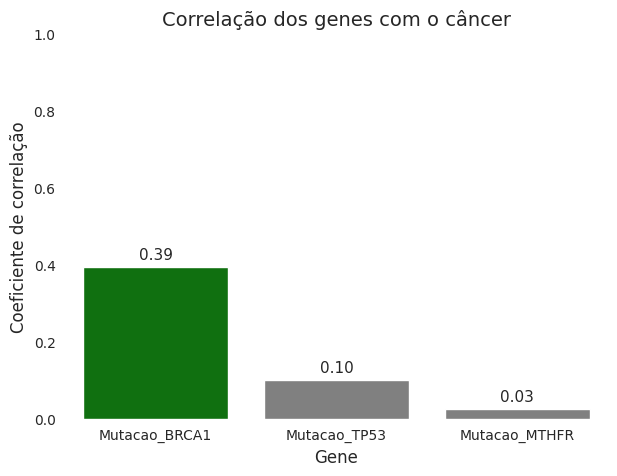

In [ ]:
sns.set_style("white")  # fundo branco minimalista

# Definir cores: BRCA1 em verde, outros em cinza
cores = ["green" if g == "Mutacao_BRCA1" else "gray" for g in correlacao_cancer.index]

plt.figure(figsize=(7,5))
sns.barplot(x=correlacao_cancer.index, y=correlacao_cancer.values, palette=cores)

plt.title("Correlação dos genes com o câncer", fontsize=14)
plt.ylabel("Coeficiente de correlação", fontsize=12)
plt.xlabel("Gene", fontsize=12)
plt.ylim(0,1)

# Adicionar valores no topo das barras
for i, v in enumerate(correlacao_cancer.values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=11)

# Remover todas as bordas
sns.despine(top=True, right=True, left=True, bottom=True)
plt.grid(False)

plt.show()

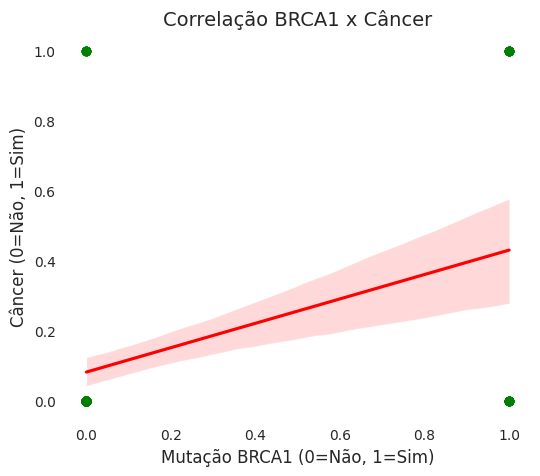

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")  # fundo limpo e minimalista
plt.figure(figsize=(6,5))

# Converter Sim/Não para 0/1 apenas para BRCA1 e Câncer
df_corr = df_num[["Mutacao_BRCA1","Cancer"]]

# Gráfico de regressão linear
sns.regplot(x="Mutacao_BRCA1", y="Cancer", data=df_corr,
            scatter_kws={"alpha":0.5, "color":"green"},  # pontos em verde
            line_kws={"color":"red"})  # linha de regressão em vermelho

plt.title("Correlação BRCA1 x Câncer", fontsize=14)
plt.xlabel("Mutação BRCA1 (0=Não, 1=Sim)", fontsize=12)
plt.ylabel("Câncer (0=Não, 1=Sim)", fontsize=12)

# Remover todas as bordas
sns.despine(top=True, right=True, left=True, bottom=True)
plt.grid(False)

plt.show()


Pessoas com a mutação BRCA1 têm mais chance de desenvolver câncer do que pessoas sem a mutação.

A correlação não é perfeita, mas é moderada e positiva, já que a linha sobe, mas nem todos com a mutação têm câncer e nem todos sem a mutação estão livres do câncer.

## Diferença entre homens e mulheres

O câncer de mama é muito mais comum em mulheres.  
Nos homens, apenas cerca de **1% dos casos** aparecem.


In [ ]:
rel_sexo = pd.crosstab(df["Sexo"], df["Cancer"])
rel_sexo


Cancer,Não,Sim
Sexo,,
F,109,31
M,59,1


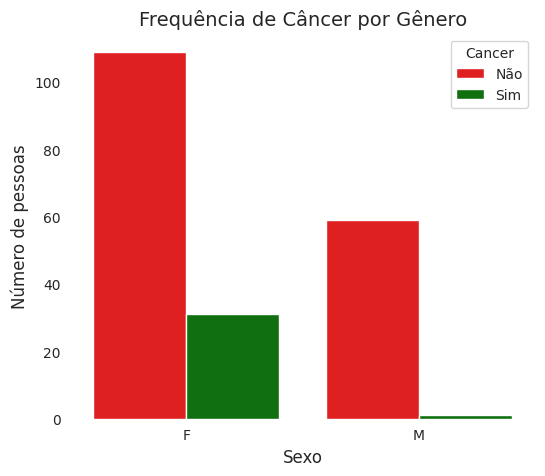

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")  # fundo minimalista

# Transformar crosstab em DataFrame para plotar
rel_sexo_df = rel_sexo.reset_index().melt(id_vars="Sexo", var_name="Cancer", value_name="Contagem")

plt.figure(figsize=(6,5))

# Gráfico com cores por Cancer
sns.barplot(x="Sexo", y="Contagem", hue="Cancer", data=rel_sexo_df,
            palette={"Sim":"green","Não":"red"}, dodge=True)

plt.title("Frequência de Câncer por Gênero", fontsize=14)
plt.ylabel("Número de pessoas", fontsize=12)
plt.xlabel("Sexo", fontsize=12)

# Remover bordas e grid
sns.despine(top=True, right=True, left=True, bottom=True)
plt.grid(False)

plt.show()

## Conclusão

Neste notebook exploramos a relação entre **mutações genéticas, idade, gênero e ocorrência de câncer de mama** utilizando uma base de dados simulada. A análise foi feita de forma **exploratória**, com tabelas, médias, frequências e gráficos modernos e minimalistas usando Seaborn.

### Pontos importantes:

1. **Média de câncer de mama por gênero**  
   - A ocorrência de câncer de mama é predominantemente em mulheres, como esperado, mas também foi incluída uma pequena proporção de homens para evidenciar que o risco existe, embora muito menor.

2. **Média de câncer de mama por idade**  
   - Observa-se que a probabilidade de desenvolver câncer de mama aumenta com a idade, confirmando tendências biológicas conhecidas.

3. **Correlação entre genes e câncer de mama**  
   - Entre os genes analisados, **BRCA1** apresentou a maior correlação com a ocorrência de câncer de mama, indicando que sua mutação aumenta significativamente o risco da doença.  
   - TP53 apresentou correlação moderada, enquanto MTHFR não mostrou relação relevante, servindo como controle.

4. **Frequências e contagens**  
   - As tabelas mostraram a distribuição das mutações genéticas e a proporção de pessoas com câncer de mama em cada grupo, reforçando a importância do BRCA1.

5. **Gráficos de regressão e correlação**  
   - A tendência de aumento do risco de câncer de mama com a idade e a presença de mutações nos genes foi visualizada com gráficos de regressão linear, facilitando a interpretação.

### Considerações finais:

- Este notebook demonstra como a **Bioinformática e a análise de dados** podem ajudar a **entender fatores de risco do câncer de mama** e identificar genes críticos associados à doença.  
- Mesmo com dados simulados, foi possível observar padrões importantes: diferenças por gênero, influência da idade e genes de alto risco como BRCA1.  
- Ferramentas como Python, Pandas e Seaborn permitem transformar dados complexos em **insights claros e visuais**, fundamentais para pesquisa e medicina personalizada.

> **Destaque:** A mutação BRCA1 se mostrou o principal fator de risco para câncer de mama, e a análise por idade reforça a importância de monitoramento e prevenção contínua, especialmente em mulheres mais velhas.
